In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [17]:
import os
#os.getcwd()
os.chdir('/Users/barje/Desktop/python_files/week5/')

In [18]:
df = pd.read_csv('train_titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count()]] #/ len(df) >= 0.3]]
del df2['Embarked']
print("List of dropped columns:", end=" ")

for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df

df3 = df2.drop(df.index[1])
print("dropped row index number :", end=" ")
for r in df.index:
    if r not in df3.index:
        print(r, end=", ")
print('\n')
df = df
#drop rows with containing null values
df2.dropna()
print("dropped rows with null values",df2.dropna())
#df3 = df[[rows for rows in df if df[row].count() / len(df) >= 0.3]]
#df3 = df.drop('1')


List of dropped columns: Embarked, 

dropped row index number : 1, 

dropped rows with null values      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
21            22         1       2   
23            24         1       1   
27            28         0       1   
52            53         1       1   
54            55         0       1   
61            62         1       1   
62            63         0       1   
66            67         1       2   
75            76         0       3   
88            89         1       1   
92            93         0       1   
96            97         0       1   
97            98         1       1   
102          103         0       1   
110          111         0       1   
118          119         0       1   
123          124         1       2   
124          125         0 

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
print(df['Fare'].describe())


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


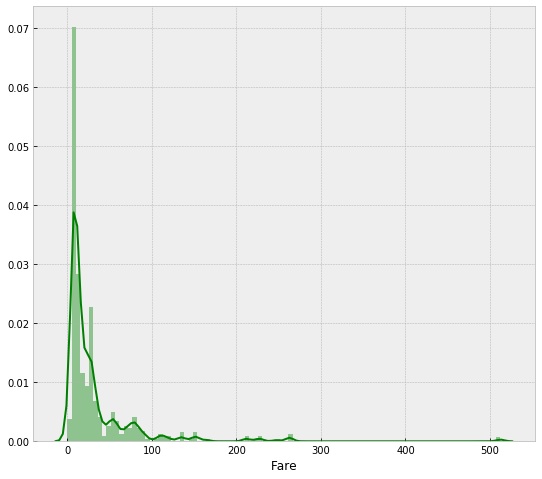

In [23]:
plt.figure(figsize=(9,8))
sns.distplot(df['Fare'], color='g', bins=100, hist_kws={'alpha': 0.4});

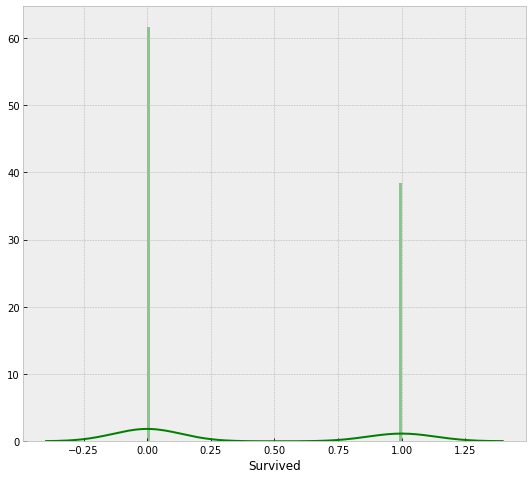

In [24]:
plt.figure(figsize=(9,8))
sns.distplot(df['Survived'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [28]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


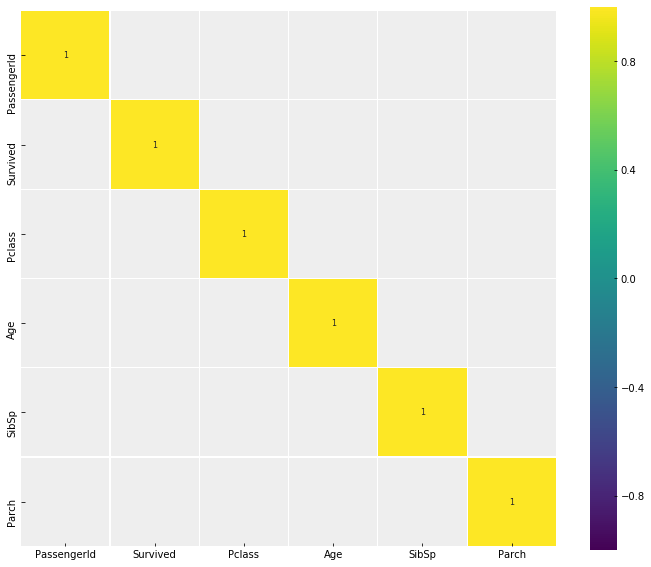

In [29]:
corr = df_num.drop('Fare', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);